# Assignment8

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("car_data.csv")

In [4]:
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [5]:
df.drop_duplicates()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [6]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [7]:
df.dtypes

Price       float64
Mileage       int64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

In [8]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [9]:
'''q3 = df.Price.quantile(0.75)
q1 = df.Price.quantile(0.25)
iqr = q3 - q1
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper'''

'q3 = df.Price.quantile(0.75)\nq1 = df.Price.quantile(0.25)\niqr = q3 - q1\nupper = q3 + (1.5*iqr)\nlower = q1 - (1.5*iqr)\nlower, upper'

In [10]:
#df.Price = df.Price.clip(-4393.290277667038, 45383.68078365926)

In [11]:
df.loc[(df.Price > 45383.68078365926), :]

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
80,51154.047216,2202,Cadillac,CST-V,Sedan 4D,Sedan,8,5.7,4,1,1,1
81,49248.158967,6685,Cadillac,CST-V,Sedan 4D,Sedan,8,5.7,4,1,0,1
82,46747.673270,15343,Cadillac,CST-V,Sedan 4D,Sedan,8,5.7,4,1,1,1
140,48310.329545,788,Cadillac,STS-V8,Sedan 4D,Sedan,8,4.6,4,1,0,1
141,48365.980897,2616,Cadillac,STS-V8,Sedan 4D,Sedan,8,4.6,4,1,1,1
150,70755.466717,583,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
151,68566.187189,6420,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
152,69133.731722,7892,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
153,66374.307040,12021,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
154,65281.481237,15600,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1


In [12]:
q3 = df.Mileage.quantile(0.75)
q1 = df.Mileage.quantile(0.25)
iqr = q3 - q1
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper

(-1260.75, 41097.25)

In [13]:
df.Mileage = df.Mileage.clip(-1260.75, 41097.25)

In [14]:
q3 = df.Cylinder.quantile(0.75)
q1 = df.Cylinder.quantile(0.25)
iqr = q3 - q1
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper

(1.0, 9.0)

In [15]:
q3 = df.Liter.quantile(0.75)
q1 = df.Liter.quantile(0.25)
iqr = q3 - q1
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper

(-0.1999999999999993, 6.199999999999999)

In [16]:
q3 = df.Doors.quantile(0.75)
q1 = df.Doors.quantile(0.25)
iqr = q3 - q1
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper

(4.0, 4.0)

In [17]:
q3 = df.Cruise.quantile(0.75)
q1 = df.Cruise.quantile(0.25)
iqr = q3 - q1
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper

(1.0, 1.0)

In [18]:
q3 = df.Sound.quantile(0.75)
q1 = df.Sound.quantile(0.25)
iqr = q3 - q1
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper

(-1.5, 2.5)

In [19]:
q3 = df.Leather.quantile(0.75)
q1 = df.Leather.quantile(0.25)
iqr = q3 - q1
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper

(-1.5, 2.5)

In [20]:
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229.0,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095.0,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484.0,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979.0,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [21]:
df.to_csv('car_data_clean.csv')

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

# Mileage vs Price

<AxesSubplot:xlabel='Mileage', ylabel='Price'>

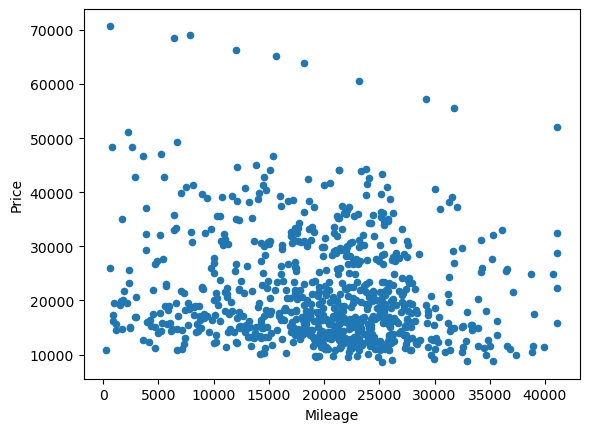

In [22]:
df.plot.scatter(x ='Mileage', y = 'Price')

In [23]:
df[['Price', 'Mileage']].corr()

,Price,Mileage
Price,1.000000,-0.146283
Mileage,-0.146283,1.000000


In [24]:
df['transformed'] = np.power(df['Mileage'],3)

In [25]:
df[['Price', 'transformed']].corr()

,Price,transformed
Price,1.000000,-0.099925
transformed,-0.099925,1.000000


In [26]:
df['transformed_1'] = np.exp(df['Mileage'])

C:\Python\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [27]:
df[['Price', 'transformed_1']].corr()

,Price,transformed_1
Price,1.0,-0.0
transformed_1,-0.0,NaN


There is no linear relationship with price and Mileage even after transformation. Hence this feature is dropped.

In [28]:
df.drop(['transformed', 'transformed_1'], axis = 1, inplace = True)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

# EDA

In [29]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

# Cylinder vs Price

<AxesSubplot:xlabel='Cylinder', ylabel='Price'>

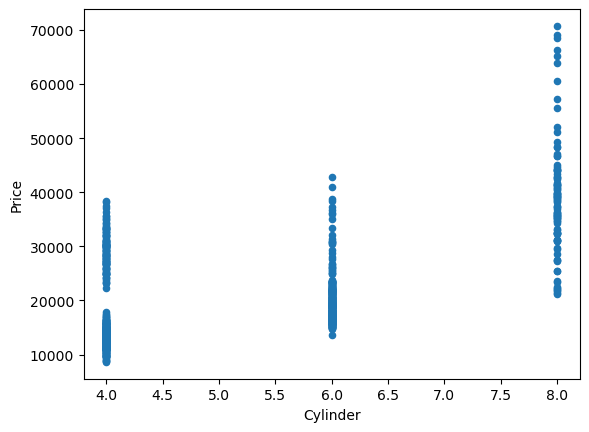

In [30]:
df.plot.scatter('Cylinder', 'Price')

<AxesSubplot:xlabel='Cylinder'>

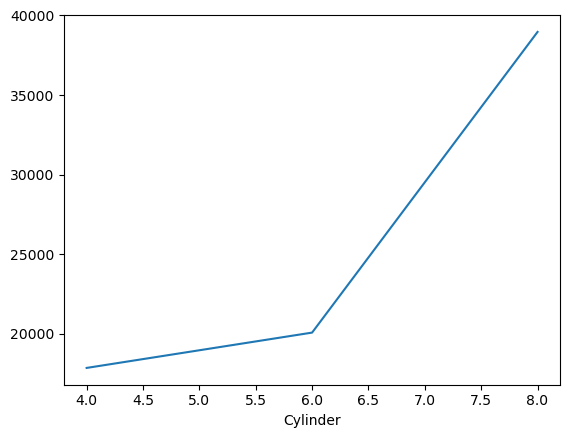

In [31]:
df.groupby('Cylinder')['Price'].mean().plot()

In [32]:
df[['Cylinder', 'Price']].corr()

,Cylinder,Price
Cylinder,1.000000,0.569086
Price,0.569086,1.000000


There is good correlation so we will take Cylinder as a feature

# Liter vs Price

<AxesSubplot:xlabel='Liter', ylabel='Price'>

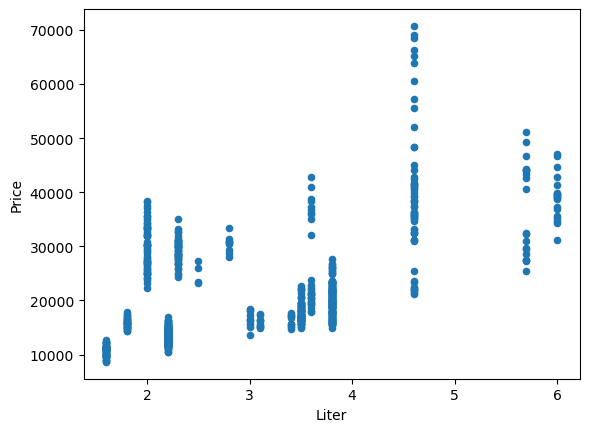

In [33]:
df.plot.scatter('Liter', 'Price')

<AxesSubplot:xlabel='Liter'>

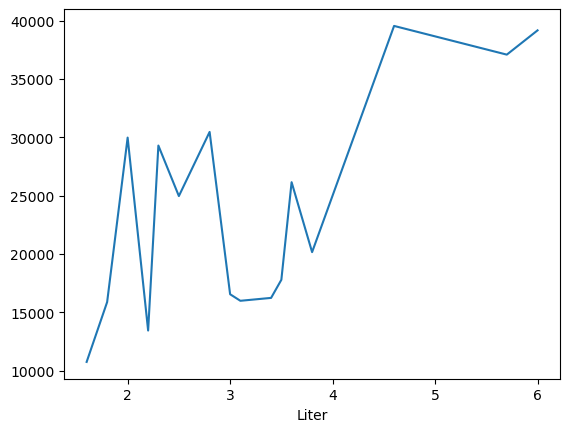

In [34]:
df.groupby('Liter')['Price'].mean().plot()

In [35]:
df[['Liter', 'Price']].corr()

,Liter,Price
Liter,1.000000,0.558146
Price,0.558146,1.000000


There is good correlation so we will take Liter as a feature

# Doors vs Price

<AxesSubplot:xlabel='Doors', ylabel='Price'>

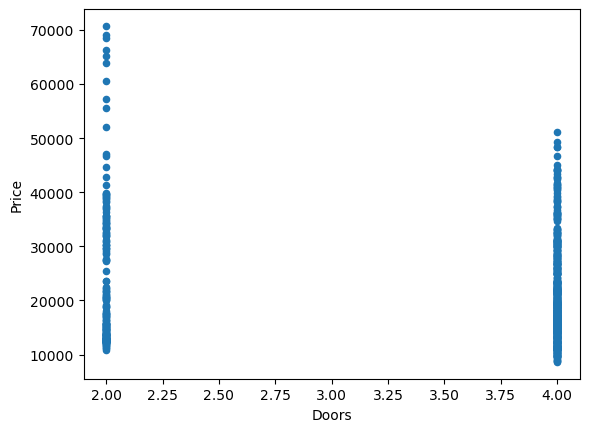

In [36]:
df.plot.scatter('Doors', 'Price')

<AxesSubplot:xlabel='Doors'>

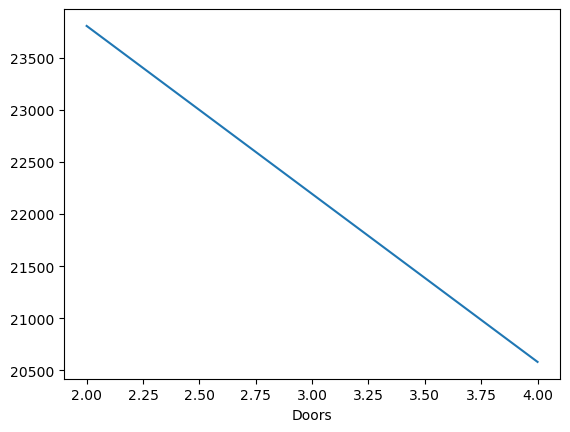

In [37]:
df.groupby('Doors')['Price'].mean().plot()

In [38]:
df[['Doors', 'Price']].corr()

,Doors,Price
Doors,1.00000,-0.13875
Price,-0.13875,1.00000


Thers is no correlation between Doors and Price, So we will try transformation

In [39]:
df['Tran_Doors'] = np.log(df['Doors'])

In [40]:
df[['Tran_Doors', 'Price']].corr()

,Tran_Doors,Price
Tran_Doors,1.00000,-0.13875
Price,-0.13875,1.00000


There is good correlation so we will take Tran_Doors as a feature

# Cruise vs Price

<AxesSubplot:xlabel='Cruise', ylabel='Price'>

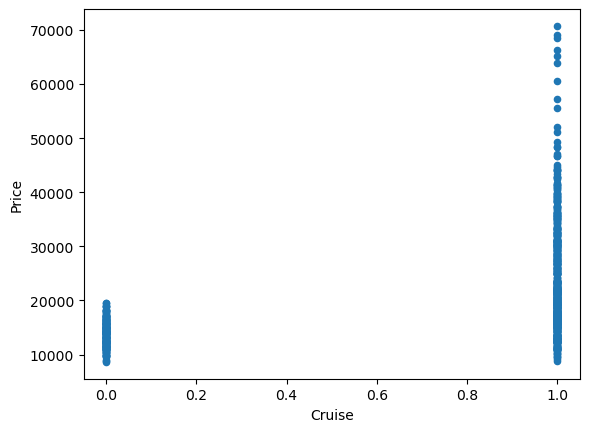

In [41]:
df.plot.scatter('Cruise', 'Price')

<AxesSubplot:xlabel='Cruise'>

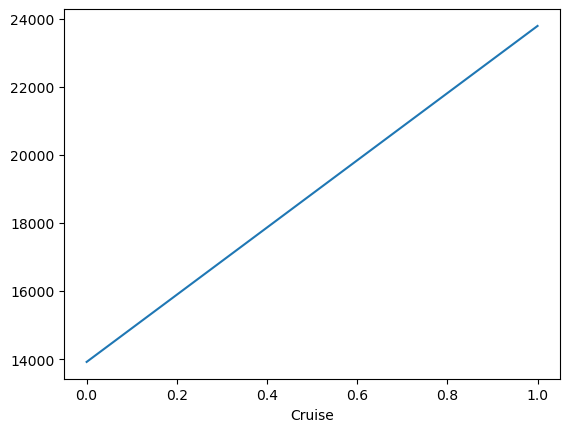

In [42]:
df.groupby('Cruise')['Price'].mean().plot()

In [43]:
df[['Cruise', 'Price']].corr()

,Cruise,Price
Cruise,1.000000,0.430851
Price,0.430851,1.000000


There is good correlation so we will take Cruise as a feature

# Sound vs Price

<AxesSubplot:xlabel='Sound', ylabel='Price'>

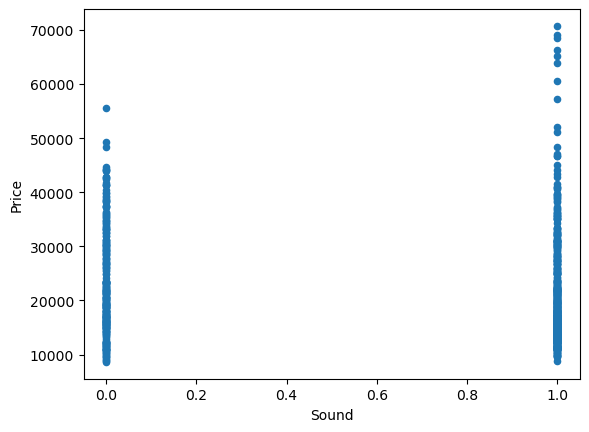

In [44]:
df.plot.scatter('Sound', 'Price')

<AxesSubplot:xlabel='Sound'>

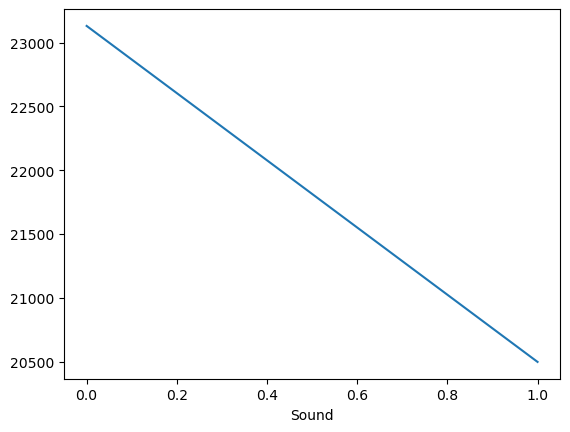

In [45]:
df.groupby('Sound')['Price'].mean().plot()

In [46]:
df[['Sound', 'Price']].corr()

,Sound,Price
Sound,1.000000,-0.124348
Price,-0.124348,1.000000


Thers is no correlation between Sound and Price, So we will try transformation

In [47]:
df['Tran_Sound'] = np.power(df['Sound'], 3)

<AxesSubplot:xlabel='Tran_Sound'>

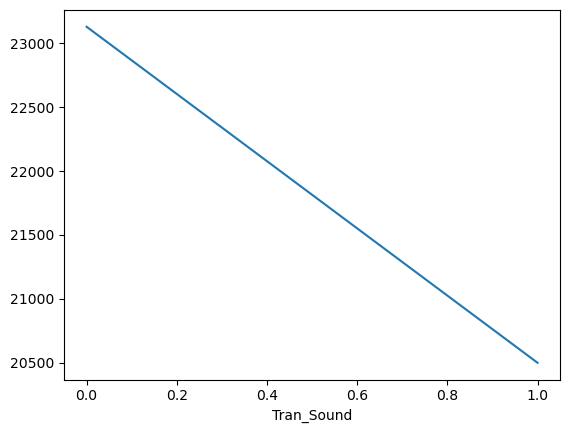

In [48]:
df.groupby('Tran_Sound')['Price'].mean().plot()

In [49]:
df[['Tran_Sound', 'Price']].corr()

,Tran_Sound,Price
Tran_Sound,1.000000,-0.124348
Price,-0.124348,1.000000


1) There is no linear relationship between Sound and Price
2) Have tried all trasnformations - still not able to see a good linear relationship
3) Have decided to drop the feature

In [50]:
df.drop(['Tran_Sound'], axis = 1, inplace = True)

In [51]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather', 'Tran_Doors'],
      dtype='object')

# Leather vs Price

<AxesSubplot:xlabel='Leather', ylabel='Price'>

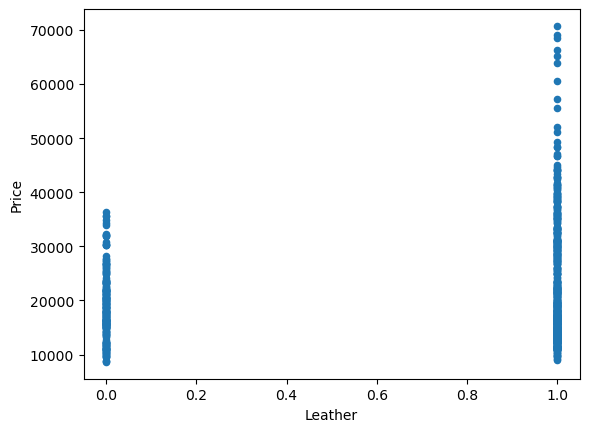

In [52]:
df.plot.scatter('Leather', 'Price')

<AxesSubplot:xlabel='Leather'>

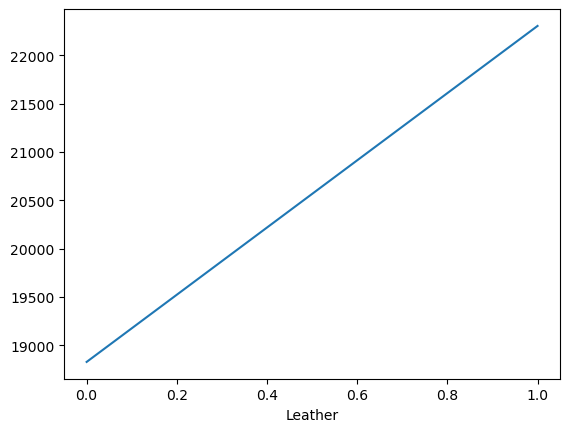

In [53]:
df.groupby('Leather')['Price'].mean().plot()

In [54]:
df[['Leather', 'Price']].corr()

,Leather,Price
Leather,1.000000,0.157197
Price,0.157197,1.000000


Thers is no correlation between Leather and Price, So we will try transformation

In [55]:
df['Tran_Leather'] = np.power(df['Leather'], 5)

In [56]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,Tran_Doors,Tran_Leather
0,17314.103129,8221.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1,1.386294,1
1,17542.036083,9135.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,1.386294,0
2,16218.847862,13196.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,1.386294,0
3,16336.913140,16342.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0,1.386294,0
4,16339.170324,19832.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1,1.386294,1


<AxesSubplot:xlabel='Tran_Leather'>

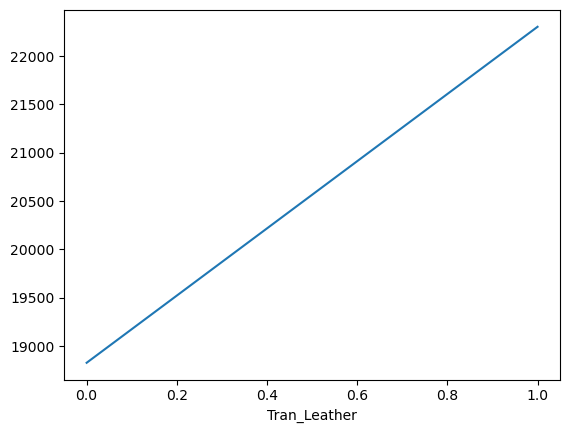

In [57]:
df.groupby('Tran_Leather')['Price'].mean().plot()

In [58]:
df[['Tran_Leather', 'Price']].corr()

,Tran_Leather,Price
Tran_Leather,1.000000,0.157197
Price,0.157197,1.000000


1) There is no linear relationship between Leather and Price
2) Have tried all trasnformations - still not able to see a good linear relationship
3) Have decided to drop the feature

In [59]:
df.drop(['Tran_Leather'], axis = 1, inplace = True)

In [60]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,Tran_Doors
0,17314.103129,8221.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1,1.386294
1,17542.036083,9135.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,1.386294
2,16218.847862,13196.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,1.386294
3,16336.913140,16342.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0,1.386294
4,16339.170324,19832.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1,1.386294


In [61]:
df.to_csv('cardata.csv')

# 1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

In [62]:
df.shape

(804, 13)

 We will drop Mileage, Sound, Leather as a feature and we will use Cylinder, Liter, Cruise, Tran_Doors as feature

Split

In [63]:
from sklearn.model_selection import train_test_split
X = df[['Cylinder', 'Liter', 'Cruise']].values
y = df['Price'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

Scale

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model

In [65]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)

LinearRegression()

In [66]:
reg.coef_

array([4559.13164379,  300.62213046, 2619.87725263])

In [67]:
coef_df = pd.DataFrame(reg.coef_,['Cylinder', 'Liter', 'Cruise'], columns=['Coefficient'])
coef_df

,Coefficient
Cylinder,4559.131644
Liter,300.622130
Cruise,2619.877253


In [68]:
reg.intercept_

20993.71872568573

In [69]:
y_predict_without_cat = reg.predict(X_test_scaled)

In [70]:
df_predict = pd.DataFrame({'Actual' : y_test, 'Predicted 1' : y_predict_without_cat})
df_predict

,Actual,Predicted 1
0,16860.094326,25426.311189
1,20109.904121,25508.010611
2,41053.482168,32352.118632
3,10805.130090,18282.638621
4,15084.815404,18446.037465
...,...,...
237,42773.028390,32733.382601
238,40335.737314,32352.118632
239,11873.533995,12497.828305
240,15635.796160,12497.828305


# 2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [71]:
from sklearn import metrics
reg.score(X_test, y_test)

-7.768793061583423

# 3.Tasks, Hard Mode 
Research dummy variables in scikit-learn to see how to use the make, model, and body type.
Find the best combination of factors to predict price.

In [72]:
df = pd.read_csv('car_data_clean.csv')
df.head()

,Unnamed: 0,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,0,17314.103129,8221.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,1,17542.036083,9135.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,2,16218.847862,13196.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,3,16336.913140,16342.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,4,16339.170324,19832.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [73]:
df.columns

Index(['Unnamed: 0', 'Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type',
       'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [74]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [75]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [76]:
df.Cylinder.value_counts()

4    394
6    310
8    100
Name: Cylinder, dtype: int64

In [77]:
df.Liter.value_counts()

2.2    190
3.8    160
3.5     80
4.6     60
1.6     60
2.0     60
2.3     50
3.6     30
1.8     30
5.7     20
6.0     20
3.1     10
2.8     10
3.4     10
3.0     10
2.5      4
Name: Liter, dtype: int64

In [78]:
df.Doors.value_counts()

4    614
2    190
Name: Doors, dtype: int64

In [79]:
df.Sound.value_counts()

1    546
0    258
Name: Sound, dtype: int64

In [80]:
df.Leather.value_counts()

1    582
0    222
Name: Leather, dtype: int64

In [81]:
df.Cruise.value_counts()

1    605
0    199
Name: Cruise, dtype: int64

In [82]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Cylinder'] = encoder.fit_transform(df['Cylinder'])
df['Liter'] = encoder.fit_transform(df['Liter'])
df['Doors'] = encoder.fit_transform(df['Doors'])
df['Cruise'] = encoder.fit_transform(df['Cruise'])
df['Sound'] = encoder.fit_transform(df['Sound'])
df['Leather'] = encoder.fit_transform(df['Leather'])

In [83]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221.0,Buick,Century,Sedan 4D,Sedan,1,8,1,1,1,1
1,17542.036083,9135.0,Buick,Century,Sedan 4D,Sedan,1,8,1,1,1,0
2,16218.847862,13196.0,Buick,Century,Sedan 4D,Sedan,1,8,1,1,1,0
3,16336.913140,16342.0,Buick,Century,Sedan 4D,Sedan,1,8,1,1,0,0
4,16339.170324,19832.0,Buick,Century,Sedan 4D,Sedan,1,8,1,1,0,1


In [84]:
df.shape

(804, 12)

In [85]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [86]:
X = df[['Mileage','Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']].values
y = df['Price'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

from sklearn import metrics
reg.score(X_test, y_test)

0.4923141861883523

In [87]:
y_predict = reg.predict(X_test)
df_predict = pd.DataFrame({'Actual' : y_test, 'Predicted 1' : y_predict})
df_predict

,Actual,Predicted 1
0,33220.028446,35271.399329
1,34355.003728,20274.111856
2,34739.214960,34217.321429
3,11080.516378,8647.013412
4,16341.804099,16050.568304
...,...,...
237,14702.798320,19292.119374
238,23329.208256,17587.000684
239,14997.884336,13906.463499
240,39092.189918,35426.350788


<AxesSubplot:>

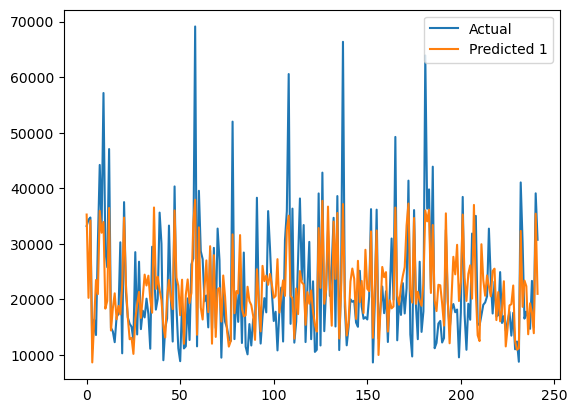

In [88]:
df_predict.plot.line()

In [89]:
coef_df = pd.DataFrame(reg.coef_,['Mileage','Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'], columns = ['Coefficient'])
coef_df

,Coefficient
Mileage,-1510.330218
Cylinder,8285.824352
Liter,-4742.945091
Doors,-961.752018
Cruise,3101.183308
Sound,-746.257368
Leather,1059.287334


In [90]:
reg.intercept_

21034.114106605317

In [91]:
df = pd.read_csv('car_data_clean.csv')
df.head()

,Unnamed: 0,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,0,17314.103129,8221.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,1,17542.036083,9135.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,2,16218.847862,13196.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,3,16336.913140,16342.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,4,16339.170324,19832.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [92]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [93]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [94]:
df = pd.get_dummies(df)

In [95]:
df.columns

Index(['Price', 'Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound',
       'Leather', 'Make_Buick', 'Make_Cadillac', 'Make_Chevrolet',
       'Make_Pontiac', 'Make_SAAB', 'Make_Saturn', 'Model_9-2X AWD',
       'Model_9_3', 'Model_9_3 HO', 'Model_9_5', 'Model_9_5 HO', 'Model_AVEO',
       'Model_Bonneville', 'Model_CST-V', 'Model_CTS', 'Model_Cavalier',
       'Model_Century', 'Model_Classic', 'Model_Cobalt', 'Model_Corvette',
       'Model_Deville', 'Model_G6', 'Model_GTO', 'Model_Grand Am',
       'Model_Grand Prix', 'Model_Impala', 'Model_Ion', 'Model_L Series',
       'Model_Lacrosse', 'Model_Lesabre', 'Model_Malibu', 'Model_Monte Carlo',
       'Model_Park Avenue', 'Model_STS-V6', 'Model_STS-V8', 'Model_Sunfire',
       'Model_Vibe', 'Model_XLR-V8', 'Trim_AWD Sportwagon 4D',
       'Trim_Aero Conv 2D', 'Trim_Aero Sedan 4D', 'Trim_Aero Wagon 4D',
       'Trim_Arc Conv 2D', 'Trim_Arc Sedan 4D', 'Trim_Arc Wagon 4D',
       'Trim_CX Sedan 4D', 'Trim_CXL Sedan 4D', 'Trim_CXS Se

In [96]:
X = df[['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound',
       'Leather', 'Make_Buick', 'Make_Cadillac', 'Make_Chevrolet',
       'Make_Pontiac', 'Make_SAAB', 'Make_Saturn', 'Model_9-2X AWD',
       'Model_9_3', 'Model_9_3 HO', 'Model_9_5', 'Model_9_5 HO', 'Model_AVEO',
       'Model_Bonneville', 'Model_CST-V', 'Model_CTS', 'Model_Cavalier',
       'Model_Century', 'Model_Classic', 'Model_Cobalt', 'Model_Corvette',
       'Model_Deville', 'Model_G6', 'Model_GTO', 'Model_Grand Am',
       'Model_Grand Prix', 'Model_Impala', 'Model_Ion', 'Model_L Series',
       'Model_Lacrosse', 'Model_Lesabre', 'Model_Malibu', 'Model_Monte Carlo',
       'Model_Park Avenue', 'Model_STS-V6', 'Model_STS-V8', 'Model_Sunfire',
       'Model_Vibe', 'Model_XLR-V8', 'Trim_AWD Sportwagon 4D',
       'Trim_Aero Conv 2D', 'Trim_Aero Sedan 4D', 'Trim_Aero Wagon 4D',
       'Trim_Arc Conv 2D', 'Trim_Arc Sedan 4D', 'Trim_Arc Wagon 4D',
       'Trim_CX Sedan 4D', 'Trim_CXL Sedan 4D', 'Trim_CXS Sedan 4D',
       'Trim_Conv 2D', 'Trim_Coupe 2D', 'Trim_Custom Sedan 4D',
       'Trim_DHS Sedan 4D', 'Trim_DTS Sedan 4D', 'Trim_GT Coupe 2D',
       'Trim_GT Sedan 4D', 'Trim_GT Sportwagon', 'Trim_GTP Sedan 4D',
       'Trim_GXP Sedan 4D', 'Trim_Hardtop Conv 2D', 'Trim_L300 Sedan 4D',
       'Trim_LS Coupe 2D', 'Trim_LS Hatchback 4D', 'Trim_LS MAXX Hback 4D',
       'Trim_LS Sedan 4D', 'Trim_LS Sport Coupe 2D', 'Trim_LS Sport Sedan 4D',
       'Trim_LT Coupe 2D', 'Trim_LT Hatchback 4D', 'Trim_LT MAXX Hback 4D',
       'Trim_LT Sedan 4D', 'Trim_Limited Sedan 4D', 'Trim_Linear Conv 2D',
       'Trim_Linear Sedan 4D', 'Trim_Linear Wagon 4D', 'Trim_MAXX Hback 4D',
       'Trim_Quad Coupe 2D', 'Trim_SE Sedan 4D', 'Trim_SLE Sedan 4D',
       'Trim_SS Coupe 2D', 'Trim_SS Sedan 4D', 'Trim_SVM Hatchback 4D',
       'Trim_SVM Sedan 4D', 'Trim_Sedan 4D', 'Trim_Special Ed Ultra 4D',
       'Trim_Sportwagon 4D', 'Type_Convertible', 'Type_Coupe',
       'Type_Hatchback', 'Type_Sedan', 'Type_Wagon']].values
y = df['Price'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

from sklearn import metrics
reg.score(X_test, y_test)

0.9903792772796736

In [97]:
coef_df = pd.DataFrame(reg.coef_,['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound',
       'Leather', 'Make_Buick', 'Make_Cadillac', 'Make_Chevrolet',
       'Make_Pontiac', 'Make_SAAB', 'Make_Saturn', 'Model_9-2X AWD',
       'Model_9_3', 'Model_9_3 HO', 'Model_9_5', 'Model_9_5 HO', 'Model_AVEO',
       'Model_Bonneville', 'Model_CST-V', 'Model_CTS', 'Model_Cavalier',
       'Model_Century', 'Model_Classic', 'Model_Cobalt', 'Model_Corvette',
       'Model_Deville', 'Model_G6', 'Model_GTO', 'Model_Grand Am',
       'Model_Grand Prix', 'Model_Impala', 'Model_Ion', 'Model_L Series',
       'Model_Lacrosse', 'Model_Lesabre', 'Model_Malibu', 'Model_Monte Carlo',
       'Model_Park Avenue', 'Model_STS-V6', 'Model_STS-V8', 'Model_Sunfire',
       'Model_Vibe', 'Model_XLR-V8', 'Trim_AWD Sportwagon 4D',
       'Trim_Aero Conv 2D', 'Trim_Aero Sedan 4D', 'Trim_Aero Wagon 4D',
       'Trim_Arc Conv 2D', 'Trim_Arc Sedan 4D', 'Trim_Arc Wagon 4D',
       'Trim_CX Sedan 4D', 'Trim_CXL Sedan 4D', 'Trim_CXS Sedan 4D',
       'Trim_Conv 2D', 'Trim_Coupe 2D', 'Trim_Custom Sedan 4D',
       'Trim_DHS Sedan 4D', 'Trim_DTS Sedan 4D', 'Trim_GT Coupe 2D',
       'Trim_GT Sedan 4D', 'Trim_GT Sportwagon', 'Trim_GTP Sedan 4D',
       'Trim_GXP Sedan 4D', 'Trim_Hardtop Conv 2D', 'Trim_L300 Sedan 4D',
       'Trim_LS Coupe 2D', 'Trim_LS Hatchback 4D', 'Trim_LS MAXX Hback 4D',
       'Trim_LS Sedan 4D', 'Trim_LS Sport Coupe 2D', 'Trim_LS Sport Sedan 4D',
       'Trim_LT Coupe 2D', 'Trim_LT Hatchback 4D', 'Trim_LT MAXX Hback 4D',
       'Trim_LT Sedan 4D', 'Trim_Limited Sedan 4D', 'Trim_Linear Conv 2D',
       'Trim_Linear Sedan 4D', 'Trim_Linear Wagon 4D', 'Trim_MAXX Hback 4D',
       'Trim_Quad Coupe 2D', 'Trim_SE Sedan 4D', 'Trim_SLE Sedan 4D',
       'Trim_SS Coupe 2D', 'Trim_SS Sedan 4D', 'Trim_SVM Hatchback 4D',
       'Trim_SVM Sedan 4D', 'Trim_Sedan 4D', 'Trim_Special Ed Ultra 4D',
       'Trim_Sportwagon 4D', 'Type_Convertible', 'Type_Coupe',
       'Type_Hatchback', 'Type_Sedan', 'Type_Wagon'], columns = ['coefficient'])
coef_df

,coefficient
Mileage,-1.483448e+03
Cylinder,-3.138428e+16
Liter,2.318937e+16
Doors,-4.953618e+15
Cruise,-1.430180e+01
...,...
Type_Convertible,3.140218e+15
Type_Coupe,-2.026710e+15
Type_Hatchback,-7.234526e+14
Type_Sedan,6.934921e+15


In [98]:
reg.intercept_

20913.52895393624

In [99]:
y_predict_with_cat = reg.predict(X_test)
df_predict['Predicted 2'] = y_predict_with_cat
df_predict

,Actual,Predicted 1,Predicted 2
0,33220.028446,35271.399329,33041.528954
1,34355.003728,20274.111856,32913.528954
2,34739.214960,34217.321429,34851.028954
3,11080.516378,8647.013412,10257.528954
4,16341.804099,16050.568304,16292.528954
...,...,...,...
237,14702.798320,19292.119374,15073.528954
238,23329.208256,17587.000684,23569.528954
239,14997.884336,13906.463499,16461.528954
240,39092.189918,35426.350788,37843.028954


<AxesSubplot:>

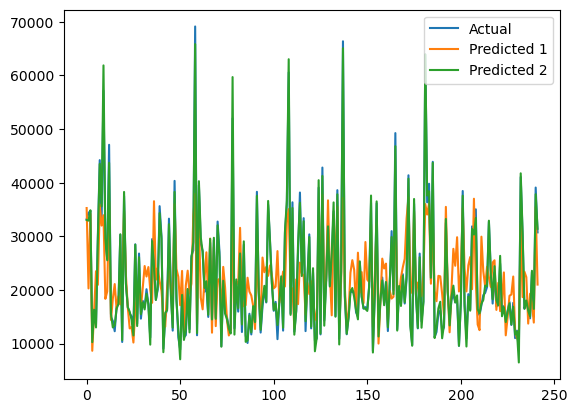

In [100]:
df_predict.plot.line()

In [101]:
df.corr()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Buick,Make_Cadillac,...,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
Price,1.000000,-0.146283,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197,-0.017768,0.659297,...,-0.126745,-0.134573,0.038838,0.040549,-0.060414,0.508018,-0.168087,-0.206178,-0.034802,0.045134
Mileage,-0.146283,1.000000,-0.028069,-0.016878,-0.015384,0.023516,-0.025447,-0.000876,0.025439,-0.037998,...,-0.062462,0.035876,-0.021541,-0.015562,-0.073738,0.022462,0.002930,-0.025064,-0.015525,0.028171
Cylinder,0.569086,-0.028069,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520,0.175317,0.534896,...,-0.102674,-0.102674,0.141306,0.059189,-0.102674,0.061533,-0.041657,-0.055019,0.180832,-0.269058
Liter,0.558146,-0.016878,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332,0.188093,0.406216,...,-0.145992,-0.145992,0.120356,0.077468,-0.125677,0.065886,0.046832,-0.125252,0.140098,-0.255308
Doors,-0.138750,-0.015384,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969,0.184913,0.087104,...,0.062428,0.062428,0.288053,0.062428,0.062428,-0.462921,-0.825444,0.157973,0.694906,0.163594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Type_Convertible,0.508018,0.022462,0.061533,0.065886,-0.462921,0.147689,-0.043637,0.009285,-0.085600,0.086456,...,-0.028899,-0.028899,-0.133346,-0.028899,-0.028899,1.000000,-0.118244,-0.073129,-0.321686,-0.075731
Type_Coupe,-0.168087,0.002930,-0.041657,0.046832,-0.825444,-0.040646,0.097838,0.063507,-0.152636,-0.152636,...,-0.051531,-0.051531,-0.237772,-0.051531,-0.051531,-0.118244,1.000000,-0.130397,-0.573605,-0.135037
Type_Hatchback,-0.206178,-0.025064,-0.055019,-0.125252,0.157973,-0.264846,0.073544,0.090697,-0.094398,-0.094398,...,0.395185,-0.031870,-0.147051,-0.031870,-0.031870,-0.073129,-0.130397,1.000000,-0.354750,-0.083515
Type_Sedan,-0.034802,-0.015525,0.180832,0.140098,0.694906,0.125714,-0.015079,-0.100940,0.266099,0.180930,...,-0.140192,0.089837,0.414521,0.089837,-0.140192,-0.321686,-0.573605,-0.354750,1.000000,-0.367373


In [102]:
corr = df.corr()["Price"].sort_values(ascending=False)[1:]
abs_corr = abs(corr)
relevant_features = abs_corr[abs_corr>0.4]
print(relevant_features)

Make_Cadillac           0.659297
Cylinder                0.569086
Liter                   0.558146
Type_Convertible        0.508018
Trim_Hardtop Conv 2D    0.472538
Model_XLR-V8            0.472538
Cruise                  0.430851
Make_Chevrolet          0.404598
Name: Price, dtype: float64
